In [ ]:
# word ->   레이블 ->  one-hot 인코딩      ->   VxV  ->  sparse matrix 
# 문장 ->   수치화 ->  count 
    - tf :  단어의 발생 빈도수 
    - tf-idf  : 단어의 발생 빈도수(NxV),    df 단어가 문서에서 얼마나 발생했는지(V)
# word2vec  -> 신경망을 사용해 저차원의 벡터를 학습
    - window,    중심단어, 주변단어

# word2vec 시각화

In [ ]:
!pip install konlpy

In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

### 1) word2vec 

In [ ]:
sentences = [
                ['this', 'is', 'a',   'good',      'product'],
                ['it',   'is', 'a',   'excellent', 'product'],
                ['it',   'is', 'a',   'bad',       'product'],
                ['that', 'is', 'the', 'worst',     'product']
            ]


In [ ]:
model = Word2Vec(sentences, size=2, window=3, min_count=1)            

In [ ]:
# 어휘집
print(model.wv.vocab.keys())
# 단어 벡터
print(model.wv['this'])

dict_keys(['this', 'is', 'a', 'good', 'product', 'it', 'excellent', 'bad', 'that', 'the', 'worst'])
[ 0.22147816 -0.03662437]


In [ ]:
# 전체 어휘에 대한 word vector 추출
for  v   in model.wv.vocab.keys() :
   print(v, model.wv[v])

x = np.array([ model.wv[v] for v in model.wv.vocab.keys() ] )  
print(x.shape)   # 단어수 by dimension

this [ 0.22147816 -0.03662437]
is [ 0.06978388 -0.16332635]
a [0.16483912 0.16518565]
good [0.05544909 0.08824889]
product [ 0.07958245 -0.04882235]
it [-0.10783027 -0.20488642]
excellent [-0.17737874  0.0796999 ]
bad [0.12415009 0.23897213]
that [0.08006773 0.19422154]
the [-0.17931446 -0.14998546]
worst [0.06274748 0.07882779]
(11, 2)


### 2) 그래프를 통한 시각화

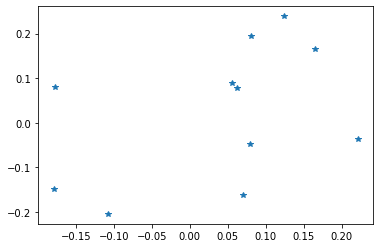

In [ ]:
plt.plot( x[:, 0], x[:, 1], '*' )

In [ ]:
label = list(model.wv.vocab.keys())
print(label[0])
label[0], x[0, :]

this


('this', array([ 0.22147816, -0.03662437], dtype=float32))

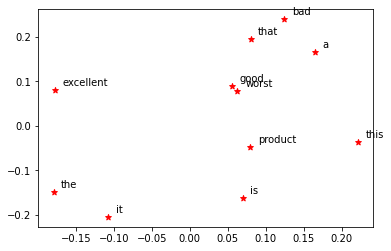

In [ ]:
for i in range(11) :
  plt.scatter(  x[i, 0], x[i, 1], marker='*', color='red')
  plt.text(  x[i, 0]+0.01, x[i, 1]+0.01, label[i], fontsize=10)

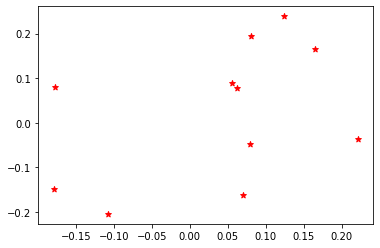

In [ ]:
for p in x :
  #print(p)
  plt.scatter(  p[0], p[1], marker='*', color='red')
  plt.text(  p[0]+0.01, p[1]+0.01, label[i], fontsize=10)

In [ ]:
# 2개의 데이터를 pair group으로 만들기

a = [1,2,3]
b = ['a', 'b', 'c']

for c in zip(a, b) :
  print(c[0], c[1])

for i, j in zip(a, b) :   # i = c[0],   j=c[1]
  print(i, j)  

for i, _ in zip(a, b) :   # i = c[0],   j=c[1]
  print(i)    

1 a
2 b
3 c
1 a
2 b
3 c
1
2
3


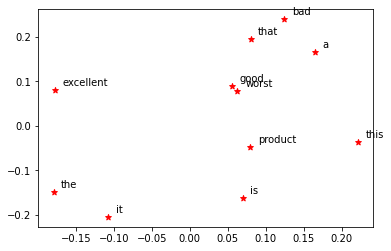

In [ ]:
for p, l in zip(x, label) :
  plt.scatter(  p[0], p[1], marker='*', color='red')
  plt.text(  p[0]+0.01, p[1]+0.01, l, fontsize=10)

# TSNE를 이용하 word2vec 시각화

In [ ]:
from sklearn.manifold import TSNE

model20 = Word2Vec(sentences, size=20, window=3, min_count=1)

x = np.array([ model20.wv[v] for v in model20.wv.vocab.keys() ] )  

label = list(model20.wv.vocab.keys())

tsne = TSNE(n_components = 2)
#tsne.fit(x)
#x_sne = tsne.transform(x)
x_sne = tsne.fit_transform(x)

print(x_sne.shape)

(11, 2)


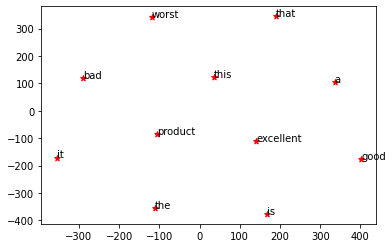

In [ ]:
for p, l in zip(x_sne, label) :
  plt.scatter(  p[0], p[1], marker='*', color='red')
  plt.text(  p[0]+0.01, p[1]+0.01, l, fontsize=10)

(11, 2)


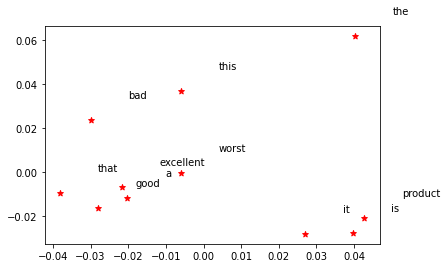

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
print(x_pca.shape)

for p, l in zip(x_pca, label) :
  plt.scatter(  p[0], p[1], marker='*', color='red')
  plt.text(  p[0]+0.01, p[1]+0.01, l, fontsize=10)

# Naver 영화 긍정/부정평가


In [ ]:
#id   영화 재미 있어요  0
# data[1:]
def read_data(filename):
    with open(filename, 'r', encoding='utf8') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:] #header 제외
    return data

train_data = read_data('./ratings_train.txt')
print(len(train_data)) 

7153


In [ ]:
train_data[10]

['9008700', '걍인피니트가짱이다.진짜짱이다♥', '1']

In [ ]:
from  konlpy.tag import Okt
pos_tagger = Okt()

def tokenize(doc):
    return['/'.join(t) for t in pos_tagger.pos(doc,norm=True,stem=True)]

tokenize('오늘 서울 날씨 어때')    

['오늘/Noun', '서울/Noun', '날씨/Noun']

In [ ]:
train_docs = [(tokenize(row[1]), row[2]) for row in train_data]

In [ ]:
train_docs[0]

(['아/Exclamation',
  '더빙/Noun',
  '../Punctuation',
  '진짜/Noun',
  '짜증나다/Adjective',
  '목소리/Noun'],
 '0')

In [ ]:
with open('train_docs.bin', 'rb') as f: train_docs = pickle.load(f) 

In [ ]:
train_docs[1]

(['흠/Noun',
  '.../Punctuation',
  '포스터/Noun',
  '보고/Noun',
  '초딩/Noun',
  '영화/Noun',
  '줄/Noun',
  '..../Punctuation',
  '오버/Noun',
  '연기/Noun',
  '조차/Josa',
  '가볍다/Adjective',
  '않다/Verb'],
 '1')

In [ ]:
train_tokens = [doc[0]  for doc in train_docs]

In [ ]:
train_tokens[1]

['흠/Noun',
 '.../Punctuation',
 '포스터/Noun',
 '보고/Noun',
 '초딩/Noun',
 '영화/Noun',
 '줄/Noun',
 '..../Punctuation',
 '오버/Noun',
 '연기/Noun',
 '조차/Josa',
 '가볍다/Adjective',
 '않다/Verb']

# 명사, 동사, 형용사 추출

In [ ]:
def getKeyword(pos) :
    return [ token.split('/')[0] for token in pos if token.split('/')[1] in ['Noun', 'Verb', 'Adjective']]  

getKeyword(train_tokens[1])

['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '가볍다', '않다']

In [ ]:
train_x = [getKeyword(doc)  for doc in train_tokens]

In [ ]:
train_x[1000]
#train_tokens[1000]

['정말', '최고', '명작', '성인', '되다', '보다', '이집트', '왕자', '또', '다른', '감동', '자체']

### word2vec

In [ ]:
%%time
model = Word2Vec(train_x, size=50, window=3, min_count=1) 
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()

CPU times: user 30.4 s, sys: 226 ms, total: 30.7 s
Wall time: 20.6 s


In [ ]:
model.save('naver.w2v')

In [ ]:
model = Word2Vec.load('naver.w2v')

### 유사어 검색

In [ ]:
model.wv.most_similar('재미')

[('감흥', 0.8017611503601074),
 ('스릴', 0.7720718383789062),
 ('제구', 0.7556378841400146),
 ('맛', 0.7450342178344727),
 ('흥미', 0.7340234518051147),
 ('진전', 0.7267226576805115),
 ('잼', 0.7248738408088684),
 ('마이나스', 0.722614586353302),
 ('어이', 0.7207885384559631),
 ('형편', 0.7184769511222839)]

In [ ]:
len(vocabs)

40686

In [ ]:
model.wv.most_similar('남자')

[('여자', 0.9300450086593628),
 ('주인공', 0.8340767025947571),
 ('착하다', 0.7882528305053711),
 ('퀸카', 0.7857269644737244),
 ('둘', 0.7771240472793579),
 ('아들', 0.7714970111846924),
 ('딸', 0.7585820555686951),
 ('남녀', 0.7501075267791748),
 ('남편', 0.7462684512138367),
 ('아버지', 0.7416093945503235)]

In [ ]:
model.wv.most_similar(positive=['정우성', '영화'])

[('왕정', 0.865249752998352),
 ('가타카', 0.8459721207618713),
 ('단편영화', 0.8418026566505432),
 ('공연', 0.8412141799926758),
 ('만화영화', 0.8391302824020386),
 ('이은주', 0.8390489220619202),
 ('양조위', 0.8368611335754395),
 ('신기', 0.8342753052711487),
 ('이연희', 0.8323482275009155),
 ('정재영', 0.8320841789245605)]

In [ ]:
model.wv.most_similar('지루')

[('시시하다', 0.9043824076652527),
 ('늘어지다', 0.8918811678886414),
 ('극치', 0.8753676414489746),
 ('유치', 0.862300455570221),
 ('별루', 0.8539683222770691),
 ('따분하다', 0.8510326147079468),
 ('허무', 0.8487430214881897),
 ('갑툭튀', 0.8462157845497131),
 ('징그럽다', 0.8459028005599976),
 ('전개도', 0.8446458578109741)]

In [ ]:
model.wv.most_similar(positive=['정우성', '여배우'])  

[('주진모', 0.9475811123847961),
 ('능청', 0.9426469802856445),
 ('류승범', 0.9424196481704712),
 ('남자배우', 0.9369833469390869),
 ('송강호', 0.9333428144454956),
 ('하지원', 0.9284607172012329),
 ('디카프리오', 0.9270623922348022),
 ('차승원', 0.9246914386749268),
 ('유아인', 0.9245845079421997),
 ('이나영', 0.9220532774925232)]

In [ ]:
model.wv.most_similar(positive=['유아인', '재미'])  

[('전장', 0.8472537994384766),
 ('개별', 0.8432127833366394),
 ('꼬아놓', 0.8424386382102966),
 ('배두나', 0.8424053192138672),
 ('후지', 0.8399091362953186),
 ('생동감', 0.8391200304031372),
 ('쩜', 0.8325079679489136),
 ('젬', 0.8298305869102478),
 ('아담샌들러', 0.8290881514549255),
 ('심리전', 0.8269898295402527)]

In [ ]:
model.wv['재미']

array([ 0.17649205, -1.5428975 ,  1.0024365 , -1.7363039 , -2.2785702 ,
        0.24083836,  0.96769136, -0.9143561 ,  0.61649483,  0.5329849 ,
       -0.5583386 , -0.39461336,  0.8230443 , -2.4888878 ,  0.88527703,
       -1.255879  ,  0.15530968, -0.87208235, -1.2471763 , -1.941501  ,
       -1.0223781 ,  0.33609065,  1.1929009 ,  3.4380724 ,  1.0050863 ,
       -0.3041486 , -1.6625569 , -1.3872714 ,  1.275723  , -1.3292786 ,
       -1.2493199 , -0.6605852 ,  0.7124988 ,  1.032339  , -0.44447875,
       -1.3284843 , -0.91228664,  3.4082243 , -0.6405655 ,  0.83652383,
        2.2286406 , -0.4081636 ,  0.25324133,  0.9235818 ,  0.71149296,
        0.6710997 ,  1.6432731 ,  0.31227604, -0.5992289 , -0.69565487],
      dtype=float32)

In [ ]:
# 영화 감정 평가
#주인공이 연기력이 떨어져요
'떨어지다' in vocabs

True

In [ ]:
model.wv.most_similar('떨어지다')

[('제로', 0.8249638676643372),
 ('약하다', 0.8207460641860962),
 ('부족하다', 0.7780107855796814),
 ('비다', 0.7723615169525146),
 ('적당하다', 0.7597516775131226),
 ('밋밋하다', 0.7517391443252563),
 ('부족', 0.7516745924949646),
 ('떨어뜨리다', 0.7513158917427063),
 ('성은', 0.7510378360748291),
 ('성하다', 0.7440852522850037)]

# 감정평가

- word2vec에서는 단어를 벡터화
- 문제는 입력은 문장임
- 문장을 고정된 크기의 벡터로 변화히기 위해 평균벡터로 만듬

주인공이 연기력이 떨어져요
주인공 ->  1x50
연기력 ->  1x50
떨어지다 -> 1x50   




### 평균벡터 구하기



In [ ]:
a = np.array([1, 4])
b = np.array([2, 7])
c = np.array([-2, 5])


d = (a + b +c) / 3
print(d)

[0.33333333 5.33333333]


In [ ]:
str = ['더빙', '진짜', '짜증나다', '목소리', '키보드']  # train_x[0]
#str = []  # train_x[0]

print(str)
feature = []
for s  in str  :
  if s in model.wv.vocab  :                            # 학습데이터에 있는 단어만  :
    feature.append(model.wv[s])                 # word vector 누적
if feature ==  [] : 
  feature = np.zeros(50)
else :
  feature = np.mean(np.array(feature), axis=0)  # 열기준 평균벡터 계산

print(feature.shape)
print(feature)

['더빙', '진짜', '짜증나다', '목소리', '키보드']
(50,)
[-0.01214395  0.20127946  0.5126892  -0.01735868 -0.48833326  0.7224753
  0.33887798 -0.2646402   0.80233705  0.91475254 -0.820802   -0.7880267
  0.16961236 -0.6534163  -0.7770268  -0.86439925  1.0904918   0.33108425
 -0.3958925  -0.2643025   0.11449573 -0.13168031 -0.74344254  0.9323
 -1.0258209  -1.0278881  -0.44597584 -0.6597414  -0.28759733 -1.0188712
  0.38322806 -1.0610671   1.0121081   1.9783502   1.2809956   0.65791285
 -0.16180027 -0.31445637  0.10834408  1.3567806   0.3423899   0.5125197
 -0.2729333   0.9555732   0.16421536 -0.3694069   0.3239882   1.5049796
 -1.1308932  -0.06135498]


In [ ]:
def get_feature(tokens) :
  feature = np.array([model.wv[token] for token in tokens  if token in  model.wv.vocab ] )  
  if feature.size == 0 : 
      return np.zeros(50)
  return np.mean(feature, axis=0)

f = get_feature(['주인공', '연기력', '떨어지다', '비추'])
print(f)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [ ]:
str = '주인공이 연기력이 떨어져서 비추합니다.'
feature = get_feature(getKeyword(tokenize(str)))
feature

array([-0.42359215,  0.0704718 ,  0.05949485, -0.5303402 , -0.82571965,
       -0.15437093,  0.5910738 ,  0.08110888,  1.4437473 , -0.1434694 ,
       -0.42621645,  0.23946247, -0.09558981, -0.59631675, -1.2657909 ,
       -0.7178616 ,  0.49117836, -0.67412794, -0.49576163,  0.10482202,
       -0.32322675,  0.90152895,  0.2434623 ,  0.93134815, -0.5006502 ,
       -0.24514051, -0.4596243 , -0.23388286,  0.18570937, -0.768566  ,
       -0.2864278 , -0.50396585,  0.5737065 ,  1.0799865 ,  0.34722516,
        1.2445103 , -0.1986579 ,  0.28730148,  0.25053698,  1.0461086 ,
        0.9837251 ,  0.5084517 ,  0.26149547, -0.09889571, -0.17436597,
        0.335617  ,  1.1155212 ,  1.3523169 , -0.62766826, -0.5664455 ],
      dtype=float32)

### 감정평가 문장 벡터 생성

In [ ]:
X = np.array([get_feature(tokens) for  tokens in train_x])
y = np.array([float(c) for _,c in train_docs])
print(X.shape, y.shape)   # 문장갯수 x 특징벡터크기

(150000, 50) (150000,)


In [ ]:
# 인식률?  73%
# logistic regression

### logistic regression을 이용한 감정분류

In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression( max_iter=1000)
reg.fit(X , y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
reg.score(X, y)   # 인식률 79.3%

0.7926666666666666

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
dt = DecisionTreeClassifier()
dt.fit(X,y)
dt.score(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
q = '주인공이 연기력이 떨어져서 비추합니다.'
feature = get_feature(getKeyword(tokenize(q)))  #
print(feature.shape)

p = reg.predict_proba(feature.reshape(-1,50))
print(p[0,1] > 0.5)

p = dt.predict(feature.reshape(-1,50))
print(p == 1 )

(50,)
False
[False]


In [ ]:
 while (True) :
  q = input()
  feature = get_feature(getKeyword(tokenize(q)))  #
  p = reg.predict_proba(feature.reshape(-1,50))
  print(p[0,1] > 0.5)

# 유저 유사도 기반 협업필터링

In [ ]:
import pandas as pd
df = pd.read_csv("toy.csv",header=None)
df.columns = ['공조', '더킹', '라라랜드', '컨택트', '너의이름']
df.index = ['재석', '명수', '하하', '준하', '세형', '광희']
df

,공조,더킹,라라랜드,컨택트,너의이름
재석,5,4,4,3,0
명수,1,0,1,0,4
하하,4,4,0,5,3
준하,0,2,1,4,3
세형,4,0,4,4,2
광희,4,2,3,0,1


In [ ]:
# 명수와 준하의 유사도
import numpy as np

v1 = df.iloc[1].values
v2 = df.iloc[3].values

q1 = np.sum(v1*v2)
q2 = np.sqrt(np.sum(v1**2))
q3 = np.sqrt(np.sum(v2**2))
s = q1 / (q2*q3)

print(q1, q2, q3, s)

13 4.242640687119285 5.477225575051661 0.5594309277855158


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

distances = cosine_similarity(df)
distances

array([[1.        , 0.26111648, 0.77272727, 0.53935989, 0.81934649,
        0.89893315],
       [0.26111648, 1.        , 0.46420708, 0.55943093, 0.52297636,
        0.47336463],
       [0.77272727, 0.46420708, 1.        , 0.83151316, 0.71692818,
        0.60677988],
       [0.53935989, 0.55943093, 0.83151316, 1.        , 0.65828059,
        0.33333333],
       [0.81934649, 0.52297636, 0.71692818, 0.65828059, 1.        ,
        0.75955453],
       [0.89893315, 0.47336463, 0.60677988, 0.33333333, 0.75955453,
        1.        ]])

In [ ]:
df2 = pd.DataFrame(distances)
df2.index = ['재석', '명수', '하하', '준하', '세형', '광희']
df2

,0,1,2,3,4,5
재석,1.000000,0.261116,0.772727,0.539360,0.819346,0.898933
명수,0.261116,1.000000,0.464207,0.559431,0.522976,0.473365
하하,0.772727,0.464207,1.000000,0.831513,0.716928,0.606780
준하,0.539360,0.559431,0.831513,1.000000,0.658281,0.333333
세형,0.819346,0.522976,0.716928,0.658281,1.000000,0.759555
광희,0.898933,0.473365,0.606780,0.333333,0.759555,1.000000


In [ ]:
# 세형이  더킹 영화에 대한 평가 점수 예측

v1 = df2.loc["세형"].values 
v2 = df["더킹"].values 
p = np.sum(v1* v2)   /   np.sum(v1)
print(p)

2.005940609004159


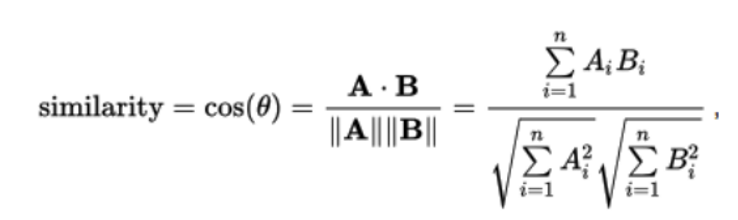

In [ ]:
v1 = df2.loc["세형"].values 
for [더킹, 공조, 라라] ..
  v2 = df["더킹"].values 
  p = np.sum(v1* v2)   /   np.sum(v1)
  print(p)

# 세형의 모든 영화에 대한 평점

In [ ]:
# 4	0	4	4	2
np.matmul(df2.values[4].reshape(1,6), df.values) / np.sum(df2.values[4] )
# 4.0 2.3  4,  3,9  2.01

array([[3.24444051, 2.00594061, 2.39828007, 2.83126174, 2.00511806]])

# 모든 사람의 모든 영화에 대한 평점

In [ ]:
result = np.matmul(df2.values, df.values)

array([[15.22514414,  9.96749517, 10.77466179, 12.29846189,  7.51835355],
       [ 8.14777472,  4.96688538,  6.1158962 ,  7.43401402,  8.59023138],
       [13.62267567,  9.96749517,  9.07468168, 13.51194719,  9.39200406],
       [10.54873872,  8.15015888,  7.34999284, 12.40876784,  9.38215771],
       [14.52563963,  8.98076891, 10.73730649, 12.67580272,  8.97708627],
       [14.43336799,  8.68951877, 10.44064867, 10.10225027,  7.2329072 ]])

In [ ]:
np.sum(df2.values, axis=1)

array([4.29148329, 3.28109549, 4.39215557, 3.9219179 , 4.47708614,
       4.07196552])

In [ ]:
a = np.array([1, 5, 6]) * 3    # [1,5,6] *   [3,3,3] = 3, 15, 18 
print(a)

[ 3 15 18]


In [ ]:
a = np.array([[1, 2, 3],[100,200,300]] )     /  np.array([3, 5]).reshape(-1,1)    
print(a)

[[ 0.33333333  0.66666667  1.        ]
 [20.         40.         60.        ]]


In [ ]:
result = np.matmul(df2.values, df.values) /  np.sum(df2.values, axis=1).reshape(-1, 1)
print(result)

[[3.54775799 2.32262239 2.51070809 2.86578347 1.75192423]
 [2.48324828 1.51378873 1.86397995 2.26571096 2.61809856]
 [3.10159224 2.26938573 2.06611117 3.07638174 2.13835869]
 [2.68968882 2.07810543 1.87408126 3.163954   2.39223715]
 [3.24444051 2.00594061 2.39828007 2.83126174 2.00511806]
 [3.54457029 2.13398634 2.5640317  2.48092726 1.77626927]]


In [ ]:
df

,공조,더킹,라라랜드,컨택트,너의이름
재석,5,4,4,3,0
명수,1,0,1,0,4
하하,4,4,0,5,3
준하,0,2,1,4,3
세형,4,0,4,4,2
광희,4,2,3,0,1


# 협업필터링 정리

In [ ]:
df = pd.read_csv("toy.csv",header=None)
distances = cosine_similarity(df)  #  유저별 가중치(신뢰도)
result = np.matmul(distances, df.values) /  np.sum(distances, axis=1).reshape(-1, 1)   #  sum(가중치*평가점수)
print(result)

[[3.54775799 2.32262239 2.51070809 2.86578347 1.75192423]
 [2.48324828 1.51378873 1.86397995 2.26571096 2.61809856]
 [3.10159224 2.26938573 2.06611117 3.07638174 2.13835869]
 [2.68968882 2.07810543 1.87408126 3.163954   2.39223715]
 [3.24444051 2.00594061 2.39828007 2.83126174 2.00511806]
 [3.54457029 2.13398634 2.5640317  2.48092726 1.77626927]]


In [ ]:
# 유저유사도 & 장르 모두 고려 추천 시스템


A영화(드라마0.15)   B영화(animation), 0.8    C영화(공포, 0.05) 
3.5      2.1      4.5


3.5/5   2.1/5     4.5/5

u = 유저유사도 0 ~ 1값
g = 장르       0 ~ 1값

p = (0.5)u + (0.5)g 







